## **<div style="text-align:center"><span style="font-size:1em;"> <code>Anticipez les besoins en consommation de bâtiments</code></span> </div>**

- Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.

- Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source.

- Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire **les émissions de CO2** et **la consommation totale d’énergie de bâtiments non destinés à l’habitation** pour lesquels elles n’ont pas encore été mesurées.



                                                  **VARIABLES CIBLES (LES TARGET) POUR LA PREDICTION**
  
  
- **GHGEmissionsIntensity** : Cette variable sera la cible pour prédire les émissions de CO2.
  
- **SiteEUIWN(kBtu/sf)** : Cette variable peut être une cible pour la consommation totale d'énergie.

              **DANS CE NOTEBOOK NOUS ALLONS TENTER DE PREDIRE LA CONSOMMATION DE CO2 GRACE A LA VARIABLE CIBLE GHGEmissionsIntensity**

## **<div style="text-align:center"><span style="font-size:1em;"> <code>Installation, importation des bibliothèques et chargement des données</code></span> </div>**

- Installation de la librairie **Scikit-learn** qui est une bibliothèque open-source de machine learning en Python.
- **Scikit-Learn**  propose des outils simples et efficaces pour **l'analyse des données** et le **data mining**.
- Elle inclut des **algorithmes pour la classification, la régression, le clustering, et bien plus encore**.

In [2]:

pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importation des bibliothèques nécéssaires à la mise en place des modèles de Machine Learning
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
import missingno as msno
from math import sqrt
import sys
import warnings
import time
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from math import sqrt
import numpy as np

# Ignorer les avertissements
warnings.filterwarnings('ignore')

# Chargement du jeu de données
SeattleComsuption_Forecast_NR2 = pd.read_csv('SeattleComsuption_Forecast_NR1.csv')


In [4]:
# La bibliothèque category_encoders propose plusieurs techniques d'encodage pour transformer ces variables catégorielles en formats numériques
# L'objectif de transformer les variables categorielles en variables numériques et de faire en sorte que les algorithmes puisse comprendre la signification de chaque variable
!pip install category_encoders
!pip install category_encoders

In [5]:
SeattleComsuption_Forecast_NR2.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,...,SiteEUIWN(kBtu/sf),Electricity(kWh),GHGEmissionsIntensity,Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),TotalEnergy(kBtu),Ratio_Electricity,Ratio_NaturalGas,Ratio_Steam
count,1576.000000,1576.000000,1576.000000,1.576000e+03,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,...,1576.000000,1.576000e+03,1576.000000,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1576.000000,1576.000000,1576.000000
mean,1961.583756,1.061626,3.694797,9.458965e+04,11176.038071,83413.609137,78106.443502,80216.763396,10585.038268,47.615985,...,70.705370,1.193946e+06,1.517363,4.073744e+06,1.491971e+06,1.772064e+05,5.742922e+06,0.697181,0.281002,0.018644
std,32.874508,0.762212,4.772554,1.253316e+05,35150.909465,107773.820649,100915.015687,68448.325934,7274.013169,0.048538,...,62.520212,1.964361e+06,2.029626,6.702399e+06,3.800193e+06,1.227164e+06,9.125578e+06,0.267468,0.266397,0.085808
min,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3636.000000,5656.000000,0.000000,0.000000,47.499170,...,0.000000,-3.382680e+04,-0.020000,-1.154170e+05,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000,0.000000,0.000000
25%,1930.000000,1.000000,1.000000,2.937000e+04,0.000000,28264.000000,25480.750000,10610.700000,10585.038268,47.584600,...,34.799999,2.092435e+05,0.340000,7.139390e+05,0.000000e+00,0.000000e+00,1.223105e+06,0.488675,0.000000,0.000000
50%,1965.000000,1.000000,2.000000,4.812550e+04,0.000000,46261.500000,42894.500000,81511.400000,10585.038268,47.612840,...,53.650000,4.591532e+05,0.850000,1.566631e+06,4.910975e+05,0.000000e+00,2.470604e+06,0.703201,0.247815,0.000000
75%,1989.000000,1.000000,4.000000,9.864250e+04,0.000000,89431.500000,85533.750000,136823.800000,10585.038268,47.649752,...,83.500000,1.287878e+06,1.820000,4.394238e+06,1.409427e+06,0.000000e+00,6.348164e+06,1.000000,0.494346,0.000000
max,2015.000000,14.000000,49.000000,1.123435e+06,368980.000000,947987.000000,808980.000000,380639.000000,103478.000000,47.733870,...,468.700012,2.011630e+07,16.990000,6.863682e+07,6.799054e+07,3.103019e+07,1.026737e+08,1.000000,1.000000,0.766988


In [6]:
SeattleComsuption_Forecast_NR2.columns

Index(['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Latitude', 'Longitude',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'Outlier',
       'ComplianceStatus', 'SiteEUIWN(kBtu/sf)', 'Electricity(kWh)',
       'GHGEmissionsIntensity', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'SteamUse(kBtu)', 'TotalEnergy(kBtu)', 'Ratio_Electricity',
       'Ratio_NaturalGas', 'Ratio_Steam'],
      dtype='object')

In [ ]:
import pandas as pd

# Liste des colonnes pertinentes
colonnes_selectionnees = ['PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 
       'SecondLargestPropertyUseTypeGFA', 
       'ThirdLargestPropertyUseTypeGFA', 
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 
       'SiteEUIWN(kBtu/sf)',
       'GHGEmissionsIntensity','Ratio_Electricity',
       'Ratio_NaturalGas', 'Ratio_Steam']

# Filtrer les colonnes disponibles dans le DataFrame
colonnes_disponibles = [col for col in colonnes_selectionnees if col in SeattleComsuption_Forecast_NR2.columns]

# Créer un DataFrame contenant uniquement les colonnes sélectionnées
SeattleComsuption_Forecast_vf = SeattleComsuption_Forecast_NR2[colonnes_disponibles]

# Supprimer les colonnes en doublon (au cas où)
SeattleComsuption_Forecast_vf = SeattleComsuption_Forecast_vf.loc[:, ~SeattleComsuption_Forecast_vf.columns.duplicated()]

# Afficher le DataFrame résultant
print(SeattleComsuption_Forecast_vf.head())


In [8]:
SeattleComsuption_Forecast_vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              1576 non-null   object 
 1   YearBuilt                        1576 non-null   float64
 2   NumberofBuildings                1576 non-null   float64
 3   NumberofFloors                   1576 non-null   float64
 4   PropertyGFATotal                 1576 non-null   float64
 5   PropertyGFAParking               1576 non-null   float64
 6   PropertyGFABuilding(s)           1576 non-null   float64
 7   LargestPropertyUseTypeGFA        1576 non-null   float64
 8   SecondLargestPropertyUseTypeGFA  1576 non-null   float64
 9   ThirdLargestPropertyUseTypeGFA   1576 non-null   float64
 10  YearsENERGYSTARCertified         1576 non-null   float64
 11  ENERGYSTARScore                  1576 non-null   float64
 12  SiteEUIWN(kBtu/sf)  

In [9]:
missing_values = SeattleComsuption_Forecast_vf.isnull().sum()
print(missing_values)

PrimaryPropertyType                0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
YearsENERGYSTARCertified           0
ENERGYSTARScore                    0
SiteEUIWN(kBtu/sf)                 0
GHGEmissionsIntensity              0
Ratio_Electricity                  0
Ratio_NaturalGas                   0
Ratio_Steam                        0
dtype: int64


## **<div style="text-align:center"><span style="font-size:1em;"> <code>Modèle de prédiction CO2</code></span> </div>**

In [10]:
# Afficher les noms de colonnes pour identifier les espaces ou caractères inattendus
print(SeattleComsuption_Forecast_vf.columns)

Index(['PrimaryPropertyType', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)',
       'GHGEmissionsIntensity', 'Ratio_Electricity', 'Ratio_NaturalGas',
       'Ratio_Steam'],
      dtype='object')


## **<div style="text-align:center"><span style="font-size:1em;"> <code>Preparation des données</code></span> </div>**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Identifier et supprimer les colonnes constantes
def remove_constant_columns(df):
    df = df.copy()
    constant_columns = [col for col in df.columns if df[col].nunique() <= 1]
    df.drop(columns=constant_columns, inplace=True)
    return df, constant_columns

# Supprimer les colonnes constantes
SeattleComsuption_Forecast_vf, constant_columns = remove_constant_columns(SeattleComsuption_Forecast_vf)
print("Colonnes supprimées (constantes) :", constant_columns)

# Vérifier les données après suppression des colonnes constantes
print("\nDonnées après suppression des colonnes constantes :")
print(SeattleComsuption_Forecast_vf.describe())

# 2. Appliquer la normalisation avec StandardScaler sur les colonnes numériques restantes
scaler = StandardScaler()
numeric_columns = SeattleComsuption_Forecast_vf.select_dtypes(include=['float64', 'int64']).columns

# Appliquer StandardScaler sur les colonnes numériques
SeattleComsuption_Forecast_vf[numeric_columns] = scaler.fit_transform(SeattleComsuption_Forecast_vf[numeric_columns])

# Vérifier les données après normalisation
print("\nDonnées après normalisation (StandardScaler) :")
print(SeattleComsuption_Forecast_vf.describe())

# 3. Encoder toutes les colonnes textuelles en utilisant One-Hot Encoding
textual_columns = SeattleComsuption_Forecast_vf.select_dtypes(include=['object']).columns

if len(textual_columns) > 0:  # Vérifier s'il y a des colonnes textuelles à encoder
    encoder = OneHotEncoder(drop='first', sparse_output=False)  # Supprimer une colonne dummy de référence
    encoded_columns = encoder.fit_transform(SeattleComsuption_Forecast_vf[textual_columns])
    
    # Créer un DataFrame pour les colonnes encodées
    encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(textual_columns), index=SeattleComsuption_Forecast_vf.index)
    
    # Concaténer les colonnes encodées avec le DataFrame principal
    SeattleComsuption_Forecast_vf = pd.concat([SeattleComsuption_Forecast_vf, encoded_df], axis=1)
    
    # Supprimer les colonnes textuelles d'origine
    SeattleComsuption_Forecast_vf.drop(columns=textual_columns, inplace=True)

# Vérifier les données après encodage
print("\nDonnées après encodage de toutes les colonnes textuelles :")
print(SeattleComsuption_Forecast_vf.head())

# 4. Validation finale : Vérifier si toutes les colonnes sont numériques et si des NaN restent
remaining_nan = SeattleComsuption_Forecast_vf.isnull().sum().sum()
print(f"\nNombre total de valeurs manquantes après traitement : {remaining_nan}")

if remaining_nan > 0:
    print("Attention : Certaines valeurs manquantes subsistent.")
else:
    print("Toutes les valeurs manquantes ont été traitées.")


In [12]:
SeattleComsuption_Forecast_vf.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,...,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
count,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,...,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,3.110879e-15,3.606816e-17,-1.803408e-17,1.803408e-17,5.410224e-17,-5.410224e-17,-9.017040e-17,-1.375099e-16,-9.017040e-18,9.558062e-16,...,0.013325,0.006980,0.056472,0.017766,0.012056,0.180203,0.024746,0.013325,0.118020,0.041878
std,1.000317e+00,1.000317e+00,1.000317e+00,1.000317e+00,1.000317e+00,1.000317e+00,1.000317e+00,1.000317e+00,1.000317e+00,1.000317e+00,...,0.114698,0.083279,0.230904,0.132144,0.109170,0.384478,0.155400,0.114698,0.322735,0.200374
min,-1.873893e+00,-1.393266e+00,-7.744218e-01,-6.648849e-01,-3.180454e-01,-7.404668e-01,-7.181631e-01,-1.172304e+00,-1.455647e+00,-3.811235e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.610419e-01,-8.087779e-02,-5.648239e-01,-5.205419e-01,-3.180454e-01,-5.118786e-01,-5.216508e-01,-1.017237e+00,0.000000e+00,2.088677e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.039507e-01,-8.087779e-02,-3.552260e-01,-3.708474e-01,-3.180454e-01,-3.448324e-01,-3.490375e-01,1.892008e-02,0.000000e+00,2.088677e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.342314e-01,-8.087779e-02,6.396993e-02,3.234730e-02,-3.180454e-01,5.585587e-02,7.362298e-02,8.272665e-01,0.000000e+00,2.088677e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.625369e+00,1.698017e+01,9.495877e+00,8.211591e+00,1.018231e+01,8.024656e+00,7.244765e+00,4.390430e+00,1.277458e+01,1.628928e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



- Cette fonction ci-dessus normalise **les colonnes** d'un jeu de données en les convertissant d'abord en type **float**, puis en appliquant un **StandardScaler pour centrer et réduire les valeurs**, en utilisant la méthode **fit_transform** pour ajuster et transformer chaque colonne.

- L'objectif de cette fonction est de **normaliser les variables du jeu de données** afin de garantir que toutes les colonnes aient une échelle comparable, avec une moyenne de 0 et un écart-type de 1, ce qui est essentiel pour améliorer la performance de nombreux algorithmes de machine learning.

In [ ]:
# Afficher le nombre de colonne du dataframe 
SeattleComsuption_Forecast_vf.columns

## **<div style="text-align:center"><span style="font-size:1em;"> <code>Separation des données en train et test set</code></span> </div>** 

In [14]:
#En définissant random_state=seed (ici avec une valeur de 42), la division des données est constante et reproductible à chaque fois qu'on execute le code
seed = 42

## **<div style="text-align:center"><span style="font-size:1em;"> <code> 1. Modèle de prédiction de l'Energie (par la régression linéaire) simple</code></span> </div>** 

In [15]:
# Afficher le nombre de colonnes, les variables que je vais utiliser pour prédire Y
num_columns = len(SeattleComsuption_Forecast_vf.columns)
print(f"Nombre de colonnes : {num_columns}")

Nombre de colonnes : 37


- On entraîne le modèle de **régression linéaire** en ajustant les variables explicatives **(X_EN_train)** aux cibles **(y_EN_train)** à l'aide de la méthode **fit()**, ce qui permet au modèle d'apprendre les relations entre les variables pour effectuer des prédictions.



Le code ci-dessous divise les données en variables explicatives (X_EN) et cible (y_EN pour la consommation totale d'énergie), puis crée des ensembles d'entraînement et de test en utilisant une fraction de 20 % pour le test, tout en maintenant la reproductibilité grâce à un paramètre de graine aléatoire (random_state=seed)

In [ ]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

# Fixer les seeds pour la reproductibilité
np.random.seed(42)
random.seed(42)

# On récupère les variables explicatives (X) et la variable cible (y)
X_EN = SeattleComsuption_Forecast_vf.drop(columns=["SiteEUIWN(kBtu/sf)","GHGEmissionsIntensity"])
y_EN = SeattleComsuption_Forecast_vf["GHGEmissionsIntensity"]

# Division des données en ensembles d'entraînement et de test
X_EN_train, X_EN_test, y_EN_train, y_EN_test = train_test_split(
    X_EN, y_EN, test_size=0.2, random_state=42  # Définir le random_state pour stabiliser la division
)

# Identification des colonnes catégorielles dans les données d'entraînement
categorical_columns = X_EN_train.select_dtypes(include=['object']).columns

# Pipeline pour encoder les colonnes catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # Encodage des variables catégorielles
    ],
    remainder='passthrough'  # Laisser les colonnes numériques telles quelles
)

# Création du modèle dans un pipeline
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Appliquer le préprocesseur (OneHotEncoder)
    ('regressor', LinearRegression())  # Modèle de régression linéaire
])

# Entraîner le modèle
regression_pipeline.fit(X_EN_train, y_EN_train)

# Faire des prédictions 
y_EN_pred = regression_pipeline.predict(X_EN_test)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Prédictions sur l'ensemble de test
test_predictions = regression_pipeline.predict(X_EN_test)  # Utilise regression_pipeline pour faire des prédictions

# Calcul des métriques sur les données de test
rmse = round(sqrt(mean_squared_error(y_EN_test, test_predictions)), 2)  # Calcul de l'erreur quadratique moyenne
r2 = round(r2_score(y_EN_test, test_predictions), 2)  # Calcul du score R²

# Affichage des résultats
print(f"RMSE = {rmse}")
print(f"R2_score = {r2}")


RMSE = 0.68
R2_score = 0.5


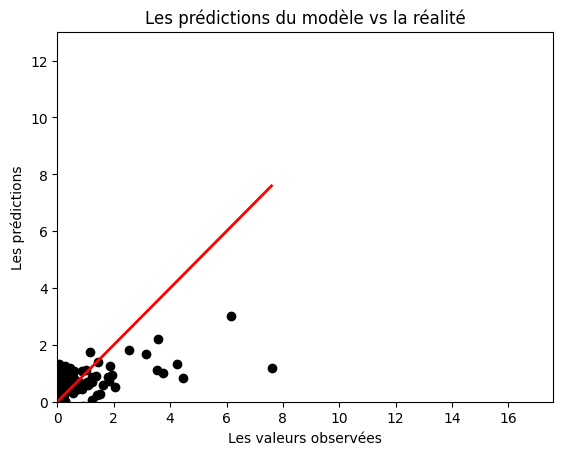

In [18]:
plt.scatter(y_EN_test, test_predictions, color='black')
plt.title("Les prédictions du modèle vs la réalité")
plt.xlabel("Les valeurs observées")
plt.ylabel("Les prédictions")

# Ajuster les limites des axes en fonction de la plage des valeurs observées et prédites
plt.xlim([0, max(y_EN_test) + 10])  # Ajuster les limites de l'axe X selon les valeurs observées
plt.ylim([0, max(test_predictions) + 10])  # Ajuster les limites de l'axe Y selon les prédictions

# Ajouter la ligne d'identité (ligne rouge diagonale)
max_range = max(max(y_EN_test), max(test_predictions))  # Trouver la plus grande valeur pour les axes
plt.plot([0, max_range], [0, max_range], 'red', lw=2)

plt.show()



## **<div style="text-align:center"><span style="font-size:1em;"> <code>1.1 La validation croisée pour évaluer la performance du modèle par la régression linéaire simple**</code></span> </div>

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from math import sqrt

# Fonction pour créer et évaluer le modèle sur un fold donné
def create_evaluate_model(index_fold, x_train, x_test, y_train, y_test):
    try:
        # Utiliser le pipeline avec le modèle de régression linéaire
        regression_pipeline.fit(x_train, y_train)
    
        # Prédictions sur le test set
        test_predictions = regression_pipeline.predict(x_test)
    
        # Calculer RMSE et R²
        rmse = sqrt(mean_squared_error(y_test, test_predictions))
        r2 = r2_score(y_test, test_predictions)
    
        # Afficher les résultats pour ce fold
        print(f"Fold {index_fold} : RMSE = {round(rmse, 2)} - R2_score = {round(r2, 2)}")
    
        return rmse, r2
    except Exception as e:
        print(f"Erreur dans le fold {index_fold} : {str(e)}")
        return None, None

# Initialiser les listes pour accumuler les résultats
rmse_scores = []
r2_scores = []

# Utiliser KFold pour diviser les données
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Appliquer KFold et évaluer le modèle pour chaque fold
for index_fold, (train_index, test_index) in enumerate(kf.split(X_EN)):
    x_train, x_test = X_EN.iloc[train_index], X_EN.iloc[test_index]
    y_train, y_test = y_EN.iloc[train_index], y_EN.iloc[test_index]
    
    # Créer et évaluer le modèle pour ce fold
    rmse, r2 = create_evaluate_model(index_fold + 1, x_train, x_test, y_train, y_test)
    
    # Accumuler les résultats si pas d'erreur
    if rmse is not None and r2 is not None:
        rmse_scores.append(rmse)
        r2_scores.append(r2)

# Calculer les moyennes des résultats si on a des résultats
if rmse_scores and r2_scores:
    average_rmse = sum(rmse_scores) / len(rmse_scores)
    average_r2 = sum(r2_scores) / len(r2_scores)

    # Afficher les moyennes
    print(f"Moyenne : RMSE = {round(average_rmse, 2)} - R2_score = {round(average_r2, 2)}")
else:
    print("Pas de résultats disponibles pour calculer la moyenne.")


Fold 1 : RMSE = 0.68 - R2_score = 0.5
Fold 2 : RMSE = 0.82 - R2_score = 0.47
Fold 3 : RMSE = 0.74 - R2_score = 0.47
Fold 4 : RMSE = 0.64 - R2_score = 0.54
Fold 5 : RMSE = 0.66 - R2_score = 0.5
Moyenne : RMSE = 0.71 - R2_score = 0.5


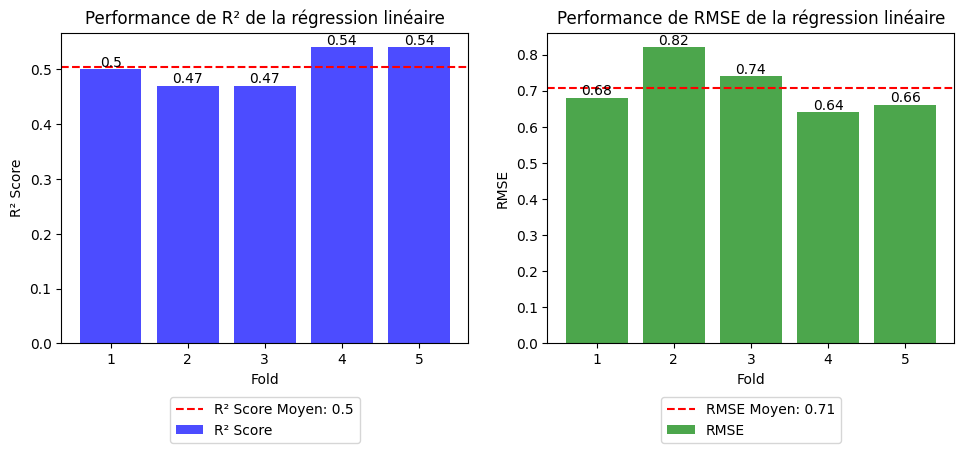

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Nouveaux scores R² et RMSE par fold
r2_scores = [0.5, 0.47, 0.47, 0.54, 0.54]
rmse_scores = [0.68, 0.82, 0.74, 0.64, 0.66]

# Moyennes des scores
r2_moyen = np.mean(r2_scores)
rmse_moyen = np.mean(rmse_scores)

# Créer des indices pour les folds
folds = np.arange(1, len(r2_scores) + 1)

# Réduction de la taille des graphiques
plt.figure(figsize=(10, 5))

# Graphique des scores R²
plt.subplot(1, 2, 1)
bars_r2 = plt.bar(folds, r2_scores, color='blue', alpha=0.7, label='R² Score')
plt.axhline(y=r2_moyen, color='red', linestyle='--', label=f'R² Score Moyen: {round(r2_moyen, 2)}')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.title('Performance de R² de la régression linéaire')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Ajouter les scores R² au-dessus de chaque barre
for bar, score in zip(bars_r2, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(score, 2), ha='center', va='bottom')

# Graphique des scores RMSE
plt.subplot(1, 2, 2)
bars_rmse = plt.bar(folds, rmse_scores, color='green', alpha=0.7, label='RMSE')
plt.axhline(y=rmse_moyen, color='red', linestyle='--', label=f'RMSE Moyen: {round(rmse_moyen, 2)}')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Performance de RMSE de la régression linéaire')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Ajouter les scores RMSE au-dessus de chaque barre
for bar, score in zip(bars_rmse, rmse_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(score, 2), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout(pad=2.0)

# Afficher les graphiques
plt.show()


## **<div style="text-align:center"><span style="font-size:1em;"> <code>2. Amelioration du modele avec la méthode Bagging (Bootstrap Aggregating)</code></span> </div>** 

**Bagging**
Le Bagging (Bootstrap Aggregating) consiste à entraîner plusieurs versions d’un modèle de régression linéaire sur différentes sous-parties des données (échantillonnées avec remplacement) et à combiner les résultats pour réduire la variance et améliorer la stabilité du modèle.

Ci dessous un modèle avec **BaggingRegressor**

In [21]:
pip show scikit-learn


Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

- Ce script implémente une amélioration du modèle de régression linéaire de base en appliquant la méthode du Bagging via BaggingRegressor. Il est particulièrement utile pour :

- Réduire la variance des prédictions.
Améliorer la robustesse des résultats, surtout si les données sont sujettes à des variations ou contiennent du bruit.

In [22]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np


# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_EN, y_EN, test_size=0.2, random_state=42)

# Créer un modèle Bagging basé sur la régression linéaire simple
regression_alg = BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42, bootstrap=True)

# Entraîner le modèle
regression_alg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regression_alg.predict(X_test)

# Calculer les métriques de performance
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {round(rmse, 2)}")
print(f"R² : {round(r2, 2)}")


RMSE : 0.68
R² : 0.5


## **<div style="text-align:center"><span style="font-size:1em;"> <code>2.1 La validation croisée pour évaluer la performance du modèle Bagging Bootstrap Aggregating**</code></span> </div>

In [23]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from math import sqrt
import numpy as np


# Fonction pour créer et évaluer un modèle Bagging avec régression linéaire comme base
def create_evaluate_model(index_fold, X_train, X_test, y_train, y_test):
    # Créer un modèle Bagging avec une base de régression linéaire
    regression_alg = BaggingRegressor(estimator=LinearRegression(), n_estimators=10, random_state=42, bootstrap=True)
    
    # Entraîner le modèle
    regression_alg.fit(X_train, y_train)
    
    test_predictions = regression_alg.predict(X_test)
    
    # Calculer RMSE et R²
    rmse = sqrt(mean_squared_error(y_test, test_predictions))
    r2 = r2_score(y_test, test_predictions)
    
    # Afficher les résultats pour ce fold
    print(f"Fold {index_fold} : RMSE = {round(rmse, 2)} - R2_score = {round(r2, 2)}")
    
    return rmse, r2

# Initialiser les listes pour accumuler les résultats
rmse_scores = []
r2_scores = []

# Utiliser KFold avec random_state pour assurer des plis identiques à chaque exécution
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Appliquer KFold et évaluer le modèle Bagging pour chaque fold
for index_fold, (train_index, test_index) in enumerate(kf.split(X_EN), start=1):
    X_train, X_test = X_EN.iloc[train_index], X_EN.iloc[test_index]
    y_train, y_test = y_EN.iloc[train_index], y_EN.iloc[test_index]
    
    # Créer et évaluer le modèle Bagging pour ce fold
    rmse, r2 = create_evaluate_model(index_fold, X_train, X_test, y_train, y_test)
    
    # Accumuler les résultats
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculer les moyennes des résultats
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

# Afficher les moyennes
print(f"Moyenne : RMSE = {round(average_rmse, 2)} - R2_score = {round(average_r2, 2)}")


Fold 1 : RMSE = 0.69 - R2_score = 0.5
Fold 2 : RMSE = 0.82 - R2_score = 0.47
Fold 3 : RMSE = 0.74 - R2_score = 0.47
Fold 4 : RMSE = 0.64 - R2_score = 0.55
Fold 5 : RMSE = 0.69 - R2_score = 0.45
Moyenne : RMSE = 0.71 - R2_score = 0.49


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scores R² et RMSE extraits de l'image
r2_scores = [0.50, 0.47, 0.47, 0.55, 0.45]
rmse_scores = [0.69, 0.82, 0.74, 0.64, 0.69]

# Moyennes des scores
r2_moyen = np.mean(r2_scores)
rmse_moyen = np.mean(rmse_scores)

# Créer des indices pour les folds
folds = np.arange(1, len(r2_scores) + 1)

# Réduction de la taille des graphiques
plt.figure(figsize=(12, 6))

# Graphique pour les scores R²
plt.subplot(1, 2, 1)
bars_r2 = plt.bar(folds, r2_scores, color='blue', alpha=0.7, label='R² Score')
plt.axhline(y=r2_moyen, color='red', linestyle='--', label=f'R² Score Moyen: {round(r2_moyen, 2)}')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.title('Performance de R² Bagging Bootstrap Aggregating')
plt.ylim(0, 1)  # Ajuster les limites de l'axe pour les scores R²
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Ajouter les scores R² au-dessus de chaque barre
for bar, score in zip(bars_r2, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(score, 2), ha='center', va='bottom')

# Graphique pour les scores RMSE
plt.subplot(1, 2, 2)
bars_rmse = plt.bar(folds, rmse_scores, color='green', alpha=0.7, label='RMSE')
plt.axhline(y=rmse_moyen, color='red', linestyle='--', label=f'RMSE Moyen: {round(rmse_moyen, 2)}')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Performance de RMSE Bagging Bootstrap Aggregating')
plt.ylim(0.6, 0.8)  # Ajuster les limites de l'axe pour exclure les valeurs extrêmes
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Ajouter les scores RMSE au-dessus de chaque barre
for bar, score in zip(bars_rmse, rmse_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(score, 2), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


## **<div style="text-align:center"><span style="font-size:1em;"> <code>3.Amelioration du modele de regression avec la méthode GradientBoostingRegressor</code></span> </div>** 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_EN, y_EN, test_size=0.2, random_state=42)

# Créer un modèle Gradient Boosting Regressor
regression_alg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraîner le modèle
regression_alg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regression_alg.predict(X_test)

# Calculer les métriques de performance
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {round(rmse, 2)}")
print(f"R² : {round(r2, 2)}")


## **<div style="text-align:center"><span style="font-size:1em;"> <code>3.1 La validation croisée pour évaluer la performance du modèle GradientBoostingRegressor</code></span> </div>** 

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from math import sqrt
import numpy as np


# Fonction pour créer et évaluer un modèle Gradient Boosting Regressor
def create_evaluate_model(index_fold, X_train, X_test, y_train, y_test):
    # Créer un modèle Gradient Boosting Regressor
    regression_alg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    
    # Entraîner le modèle
    regression_alg.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    test_predictions = regression_alg.predict(X_test)
    
    # Calculer RMSE et R²
    rmse = sqrt(mean_squared_error(y_test, test_predictions))
    r2 = r2_score(y_test, test_predictions)
    
    # Afficher les résultats pour ce fold
    print(f"Fold {index_fold} : RMSE = {round(rmse, 2)} - R2_score = {round(r2, 2)}")
    
    return rmse, r2

# Initialiser les listes pour accumuler les résultats
rmse_scores = []
r2_scores = []

# Utiliser KFold avec random_state pour assurer des plis identiques à chaque exécution
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Appliquer KFold et évaluer le modèle Gradient Boosting pour chaque fold
for index_fold, (train_index, test_index) in enumerate(kf.split(X_EN), start=1):
    X_train, X_test = X_EN.iloc[train_index], X_EN.iloc[test_index]
    y_train, y_test = y_EN.iloc[train_index], y_EN.iloc[test_index]
    
    # Créer et évaluer le modèle Gradient Boosting pour ce fold
    rmse, r2 = create_evaluate_model(index_fold, X_train, X_test, y_train, y_test)
    
    # Accumuler les résultats
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculer les moyennes des résultats
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

# Afficher les moyennes
print(f"Moyenne : RMSE = {round(average_rmse, 2)} - R2_score = {round(average_r2, 2)}")


Fold 1 : RMSE = 0.64 - R2_score = 0.56
Fold 2 : RMSE = 0.79 - R2_score = 0.51
Fold 3 : RMSE = 0.71 - R2_score = 0.51
Fold 4 : RMSE = 0.73 - R2_score = 0.41
Fold 5 : RMSE = 0.65 - R2_score = 0.5
Moyenne : RMSE = 0.71 - R2_score = 0.5


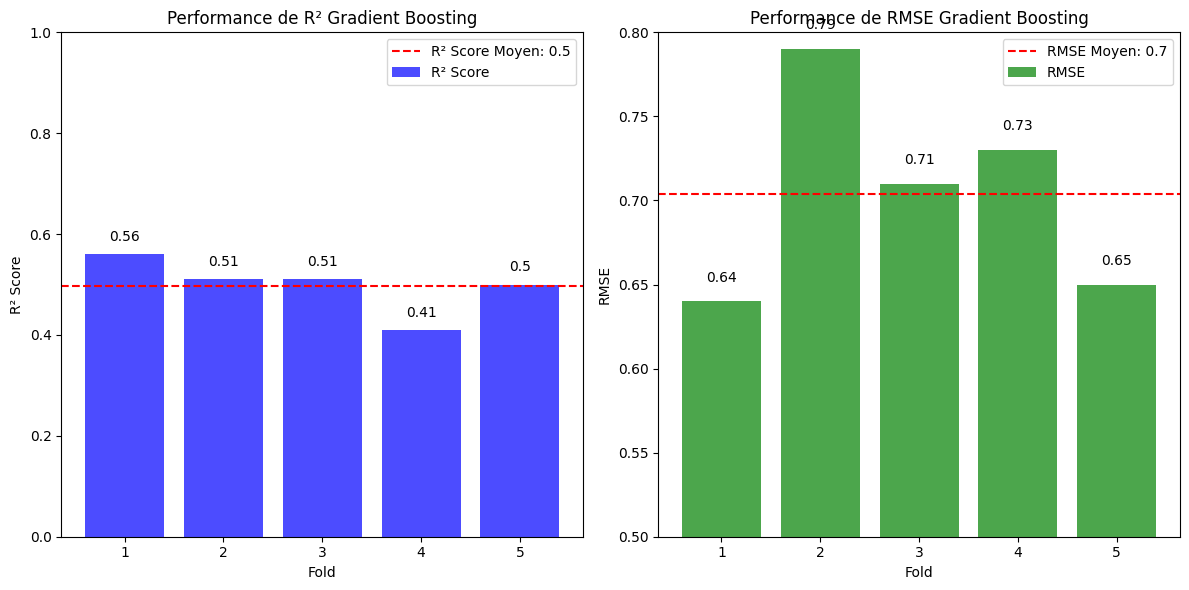

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Scores R² et RMSE par fold pour GradientBoostingRegressor
r2_scores = [0.56, 0.51, 0.51, 0.41, 0.5]
rmse_scores = [0.64, 0.79, 0.71, 0.73, 0.65]

# Moyennes des scores
r2_moyen = np.mean(r2_scores)
rmse_moyen = np.mean(rmse_scores)

# Créer des indices pour les folds
folds = np.arange(1, len(r2_scores) + 1)

# Réduction de la taille des graphiques
plt.figure(figsize=(12, 6))

# Graphique pour les scores R²
plt.subplot(1, 2, 1)
bars_r2 = plt.bar(folds, r2_scores, color='blue', alpha=0.7, label='R² Score')
plt.axhline(y=r2_moyen, color='red', linestyle='--', label=f'R² Score Moyen: {round(r2_moyen, 2)}')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.title('Performance de R² Gradient Boosting')
plt.ylim(0, 1)  # Ajuster les limites de l'axe pour une meilleure visualisation
plt.legend(loc='upper right')

# Ajouter les scores R² au-dessus de chaque barre
for bar, score in zip(bars_r2, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(score, 2), ha='center', va='bottom', fontsize=10)

# Graphique pour les scores RMSE
plt.subplot(1, 2, 2)
bars_rmse = plt.bar(folds, rmse_scores, color='green', alpha=0.7, label='RMSE')
plt.axhline(y=rmse_moyen, color='red', linestyle='--', label=f'RMSE Moyen: {round(rmse_moyen, 2)}')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Performance de RMSE Gradient Boosting')
plt.ylim(0.5, 0.8)  # Ajuster les limites de l'axe pour une visualisation plus claire
plt.legend(loc='upper right')

# Ajouter les scores RMSE au-dessus de chaque barre
for bar, score in zip(bars_rmse, rmse_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(score, 2), ha='center', va='bottom', fontsize=10)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


Les deux graphiques montrent des performances très variables du modèle Bagging Regressor : les trois premiers folds obtiennent des scores R² et RMSE acceptables, tandis que les deux derniers affichent des résultats aberrants, avec des R² extrêmement négatifs et des RMSE très élevés, indiquant que le modèle échoue complètement sur ces partitions spécifiques.

## **<div style="text-align:center"><span style="font-size:1em;"> <code>4.Amelioration du modele de regression avec la méthode StackingRegressor</code></span> </div>** 

- Le Stacking combine plusieurs modèles (par exemple, une combinaison de régressions linéaires, arbres de décision, etc.) et utilise un modèle final pour apprendre à combiner les prédictions de ces modèles. Voici comment l'implémenter avec StackingRegressor :

In [28]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_EN, y_EN, test_size=0.2, random_state=42)

# Définir les modèles de base pour le stacking (utilisant uniquement des régressions linéaires)
base_models = [
    ('linear1', LinearRegression()),  # Première instance de régression linéaire
    ('linear2', LinearRegression()),  # Deuxième instance de régression linéaire
    ('linear3', LinearRegression())   # Troisième instance de régression linéaire
]

# Définir le méta-modèle comme une régression linéaire
meta_model = LinearRegression()

# Créer le modèle Stacking Regressor sans validation croisée
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Entraîner le modèle
stacking_regressor.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = stacking_regressor.predict(X_test)

# Calculer les métriques de performance
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {round(rmse, 2)}")
print(f"R² : {round(r2, 2)}")


RMSE : 0.68
R² : 0.5


## **<div style="text-align:center"><span style="font-size:1em;"> <code>4.1 Evaluation du modele par la validation croisée avec la méthode StackingRegressor</code></span> </div>** 

In [29]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from math import sqrt
import numpy as np

# Fonction pour créer et évaluer un modèle Stacking Regressor avec régressions linéaires
def create_evaluate_model(index_fold, X_train, X_test, y_train, y_test):
    # Définir les modèles de base pour le stacking, en utilisant plusieurs régressions linéaires
    base_models = [
        ('linear1', LinearRegression()),  # Première instance de régression linéaire
        ('linear2', LinearRegression()),  # Deuxième instance de régression linéaire
        ('linear3', LinearRegression())   # Troisième instance de régression linéaire
    ]

    # Méta-modèle : régression linéaire
    meta_model = LinearRegression()

    # Créer le modèle Stacking Regressor
    stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)
    
    # Entraîner le modèle
    stacking_regressor.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    test_predictions = stacking_regressor.predict(X_test)
    
    # Calculer RMSE et R²
    rmse = sqrt(mean_squared_error(y_test, test_predictions))
    r2 = r2_score(y_test, test_predictions)
    
    # Afficher les résultats pour ce fold
    print(f"Fold {index_fold} : RMSE = {round(rmse, 2)} - R2_score = {round(r2, 2)}")
    
    return rmse, r2

# Initialiser les listes pour accumuler les résultats
rmse_scores = []
r2_scores = []

# Utiliser KFold avec random_state pour assurer des plis identiques à chaque exécution
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Appliquer KFold et évaluer le modèle Stacking pour chaque fold
for index_fold, (train_index, test_index) in enumerate(kf.split(X_EN), start=1):
    X_train, X_test = X_EN.iloc[train_index], X_EN.iloc[test_index]
    y_train, y_test = y_EN.iloc[train_index], y_EN.iloc[test_index]
    
    # Créer et évaluer le modèle Stacking pour ce fold
    rmse, r2 = create_evaluate_model(index_fold, X_train, X_test, y_train, y_test)
    
    # Accumuler les résultats
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Calculer les moyennes des résultats
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

# Afficher les moyennes
print(f"Moyenne : RMSE = {round(average_rmse, 2)} - R2_score = {round(average_r2, 2)}")


Fold 1 : RMSE = 0.97 - R2_score = -0.0
Fold 2 : RMSE = 0.82 - R2_score = 0.46
Fold 3 : RMSE = 0.74 - R2_score = 0.47
Fold 4 : RMSE = 0.64 - R2_score = 0.55
Fold 5 : RMSE = 0.93 - R2_score = -0.0
Moyenne : RMSE = 0.82 - R2_score = 0.29


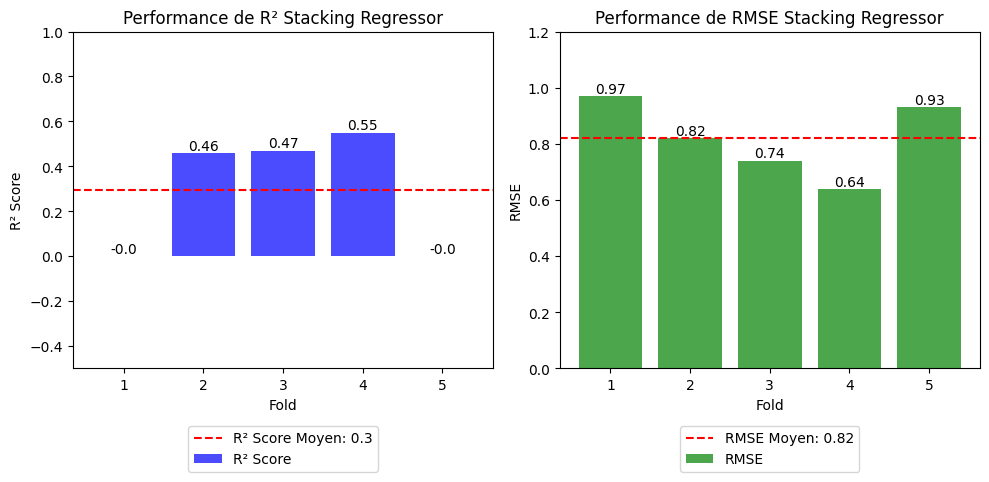

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Scores R² et RMSE par fold pour Stacking Regressor
r2_scores = [-0.0, 0.46, 0.47, 0.55, -0.0]
rmse_scores = [0.97, 0.82, 0.74, 0.64, 0.93]

# Moyennes des scores
r2_moyen = np.mean(r2_scores)
rmse_moyen = np.mean(rmse_scores)

# Créer des indices pour les folds
folds = np.arange(1, len(r2_scores) + 1)

# Taille de la figure
plt.figure(figsize=(10, 5))

# Graphique pour les scores R²
plt.subplot(1, 2, 1)
bars_r2 = plt.bar(folds, r2_scores, color='blue', alpha=0.7, label='R² Score')
plt.axhline(y=r2_moyen, color='red', linestyle='--', label=f'R² Score Moyen: {round(r2_moyen, 2)}')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.title('Performance de R² Stacking Regressor')
plt.ylim(-0.5, 1)  # Ajustement des limites de l'axe pour meilleure visualisation
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Ajouter les scores R² au-dessus de chaque barre
for bar, score in zip(bars_r2, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(score, 2), ha='center', va='bottom')

# Graphique pour les scores RMSE
plt.subplot(1, 2, 2)
bars_rmse = plt.bar(folds, rmse_scores, color='green', alpha=0.7, label='RMSE')
plt.axhline(y=rmse_moyen, color='red', linestyle='--', label=f'RMSE Moyen: {round(rmse_moyen, 2)}')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Performance de RMSE Stacking Regressor')
plt.ylim(0, 1.2)  # Ajustement des limites de l'axe pour inclure les valeurs élevées
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

# Ajouter les scores RMSE au-dessus de chaque barre
for bar, score in zip(bars_rmse, rmse_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(score, 2), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher les graphiques
plt.show()


## **<div style="text-align:center"><span style="font-size:1em;"> <code> 5.Feature Engineering (Creation des variables qui visent à améliorer la préditction)</code></span> </div>** 

**BuildingAge** : "L'âge du bâtiment (BuildingAge) peut capturer des informations sur l'efficacité énergétique et l'état général des infrastructures, ce qui pourrait influencer les besoins en énergie ou les émissions, améliorant ainsi la prédiction de la consommation d'énergie."

**ParkingGFA_Ratio** : "Le ratio de la surface de stationnement (ParkingGFA_Ratio) par rapport à la surface totale peut indiquer le niveau d'utilisation des installations pour le stationnement, ce qui pourrait indirectement influencer la consommation d'énergie des bâtiments."

**BuildingGFA_Ratio** : "Le ratio de la surface principale du bâtiment (BuildingGFA_Ratio) par rapport à la surface totale peut aider à distinguer les bâtiments avec des espaces dédiés principalement aux utilisations intérieures, ce qui pourrait avoir un effet sur les modèles de consommation d'énergie."

**GFA_Per_Floor** : "La surface totale par étage (GFA_Per_Floor) est un indicateur de la densité spatiale par étage, ce qui peut affecter la distribution et l'efficacité énergétique, améliorant la précision des prédictions pour les bâtiments à plusieurs niveaux."

In [ ]:
import pandas as pd

# Génération de nouvelles caractéristiques
SeattleComsuption_Forecast_vf['BuildingAge'] = 2024 - SeattleComsuption_Forecast_vf['YearBuilt']
SeattleComsuption_Forecast_vf['ParkingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFAParking'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['BuildingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFABuilding(s)'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['GFA_Per_Floor'] = SeattleComsuption_Forecast_vf['PropertyGFATotal'] / (SeattleComsuption_Forecast_vf['NumberofFloors'] + 1e-5)
# Afficher un aperçu des nouvelles caractéristiques
print(SeattleComsuption_Forecast_vf.head())



## **<div style="text-align:center"><span style="font-size:1em;"> <code> 6.Gradient Boosting Regressor avec les nouvelles variables</code></span> </div>** 

In [32]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np


# les nouvelles caractéristiques
SeattleComsuption_Forecast_vf['BuildingAge'] = 2024 - SeattleComsuption_Forecast_vf['YearBuilt']
SeattleComsuption_Forecast_vf['ParkingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFAParking'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['BuildingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFABuilding(s)'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['GFA_Per_Floor'] = SeattleComsuption_Forecast_vf['PropertyGFATotal'] / (SeattleComsuption_Forecast_vf['NumberofFloors'] + 1e-5)

# Définir X_EN avec les nouvelles caractéristiques et supprimer les colonnes inutilisées
X_EN = SeattleComsuption_Forecast_vf.drop(columns=["SiteEUIWN(kBtu/sf)", "GHGEmissionsIntensity"])
y_EN = SeattleComsuption_Forecast_vf["GHGEmissionsIntensity"]

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_EN, y_EN, test_size=0.2, random_state=42)

# Créer un modèle Gradient Boosting Regressor
regression_alg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraîner le modèle
regression_alg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regression_alg.predict(X_test)

# Calculer les métriques de performance
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {round(rmse, 2)}")
print(f"R² : {round(r2, 2)}")



RMSE : 0.62
R² : 0.59


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

# nouvelles caractéristiques
SeattleComsuption_Forecast_vf['BuildingAge'] = 2024 - SeattleComsuption_Forecast_vf['YearBuilt']
SeattleComsuption_Forecast_vf['ParkingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFAParking'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['BuildingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFABuilding(s)'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['GFA_Per_Floor'] = SeattleComsuption_Forecast_vf['PropertyGFATotal'] / (SeattleComsuption_Forecast_vf['NumberofFloors'] + 1e-5)

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_EN = SeattleComsuption_Forecast_vf.drop(columns=["SiteEUIWN(kBtu/sf)", "GHGEmissionsIntensity"])
y_EN = SeattleComsuption_Forecast_vf["GHGEmissionsIntensity"]

X_train, X_test, y_train, y_test = train_test_split(X_EN, y_EN, test_size=0.2, random_state=42)

# Créer un modèle Gradient Boosting Regressor
regression_alg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraîner le modèle
regression_alg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regression_alg.predict(X_test)

# Calculer les métriques de performance
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {round(rmse, 2)}")
print(f"R² : {round(r2, 2)}")


RMSE : 0.62
R² : 0.59


EUI_SiteEnergy_Interaction : Interaction entre l'intensité d'utilisation de l'énergie et la consommation totale d'énergie, ce qui pourrait capturer des relations cachées.
Electricity_NaturalGas_Ratio : Ratio entre l'électricité et le gaz naturel, utile pour capturer l'équilibre de consommation entre différentes sources d'énergie.
Logarithmic Transformations : Transformation log des variables de consommation pour réduire l'impact des valeurs extrêmes.
High_Electricity_Use : Une variable binaire indiquant une consommation élevée d'électricité.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Les nouvelles caractéristiques
SeattleComsuption_Forecast_vf['BuildingAge'] = 2024 - SeattleComsuption_Forecast_vf['YearBuilt']
SeattleComsuption_Forecast_vf['ParkingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFAParking'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['BuildingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFABuilding(s)'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['GFA_Per_Floor'] = SeattleComsuption_Forecast_vf['PropertyGFATotal'] / (SeattleComsuption_Forecast_vf['NumberofFloors'] + 1e-5)

# Définir les variables explicatives (X) et la variable cible (y)
X_EN = SeattleComsuption_Forecast_vf.drop(columns=["SiteEUIWN(kBtu/sf)", "GHGEmissionsIntensity"])  # Ajustez si nécessaire
y_EN = SeattleComsuption_Forecast_vf["GHGEmissionsIntensity"]

# Diviser les données en ensemble d'entraînement et de test
X_EN_train, X_EN_test, y_EN_train, y_EN_test = train_test_split(X_EN, y_EN, test_size=0.2, random_state=42)

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Instancier le modèle Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Configurer la recherche de grille
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécuter la recherche de grille
grid_search.fit(X_EN_train, y_EN_train)

# Meilleurs paramètres et scores
best_model = grid_search.best_estimator_
print("Meilleurs paramètres :", grid_search.best_params_)

# Faire des prédictions avec le meilleur modèle sur l'ensemble de test
y_pred = best_model.predict(X_EN_test)
rmse = sqrt(mean_squared_error(y_EN_test, y_pred))
r2 = r2_score(y_EN_test, y_pred)

# Afficher les résultats optimisés
print(f"Optimized RMSE : {round(rmse, 2)}")
print(f"Optimized R² : {round(r2, 2)}")


Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Optimized RMSE : 0.62
Optimized R² : 0.58


Fold 1 : RMSE = 0.58 - R² = 0.64
Fold 2 : RMSE = 0.78 - R² = 0.52
Fold 3 : RMSE = 0.7 - R² = 0.52
Fold 4 : RMSE = 0.72 - R² = 0.43
Fold 5 : RMSE = 0.64 - R² = 0.53

Moyenne : RMSE = 0.68 - R² = 0.53


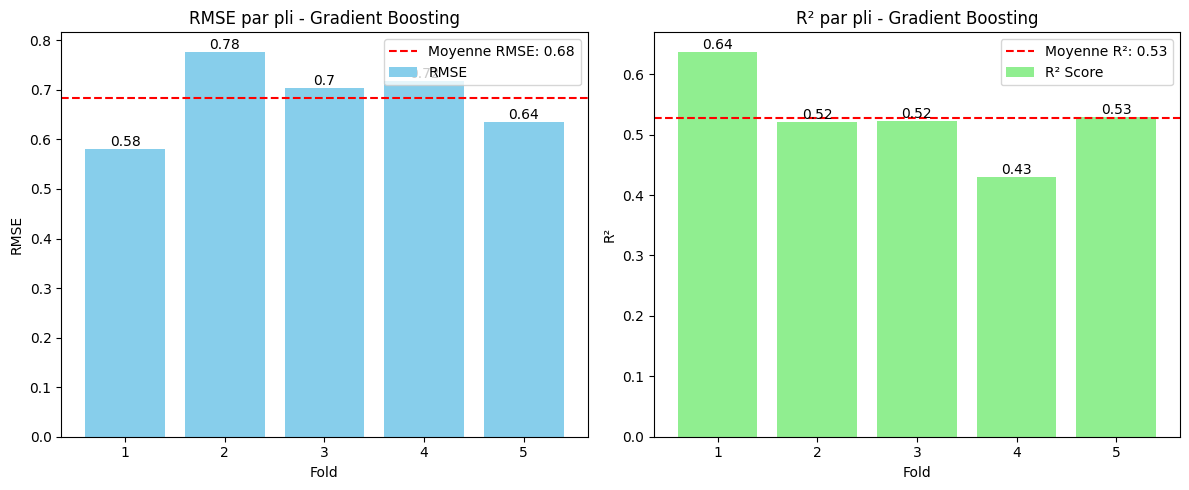

In [35]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Génération des nouvelles caractéristiques
SeattleComsuption_Forecast_vf['BuildingAge'] = 2024 - SeattleComsuption_Forecast_vf['YearBuilt']
SeattleComsuption_Forecast_vf['ParkingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFAParking'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['BuildingGFA_Ratio'] = SeattleComsuption_Forecast_vf['PropertyGFABuilding(s)'] / (SeattleComsuption_Forecast_vf['PropertyGFATotal'] + 1e-5)
SeattleComsuption_Forecast_vf['GFA_Per_Floor'] = SeattleComsuption_Forecast_vf['PropertyGFATotal'] / (SeattleComsuption_Forecast_vf['NumberofFloors'] + 1e-5)

# Définir les variables explicatives (X) et la variable cible (y)
X_EN = SeattleComsuption_Forecast_vf.drop(columns=["SiteEUIWN(kBtu/sf)", "GHGEmissionsIntensity"])  # Ajustez si nécessaire
y_EN = SeattleComsuption_Forecast_vf["GHGEmissionsIntensity"]

# Diviser les données en ensemble d'entraînement et de test
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Paramètres du modèle à partir de la recherche par grille
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Instancier le modèle Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Configurer et exécuter la recherche par grille pour obtenir les meilleurs paramètres
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_EN, y_EN)
best_params = grid_search.best_params_

# Appliquer les meilleurs paramètres
best_model = GradientBoostingRegressor(**best_params, random_state=42)

# Initialiser les listes pour stocker les scores pour chaque pli
rmse_scores = []
r2_scores = []

# Validation croisée manuelle avec les meilleurs paramètres
for fold, (train_index, test_index) in enumerate(kf.split(X_EN), start=1):
    X_train, X_test = X_EN.iloc[train_index], X_EN.iloc[test_index]
    y_train, y_test = y_EN.iloc[train_index], y_EN.iloc[test_index]
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    best_model.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble de test
    y_pred = best_model.predict(X_test)
    
    # Calculer les métriques de performance pour ce pli
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
    # Afficher les résultats pour chaque pli
    print(f"Fold {fold} : RMSE = {round(rmse, 2)} - R² = {round(r2, 2)}")

# Calculer et afficher les moyennes des scores
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)
print(f"\nMoyenne : RMSE = {round(average_rmse, 2)} - R² = {round(average_r2, 2)}")

# ---- Visualisation des scores ----
folds = np.arange(1, len(rmse_scores) + 1)

# Créer la figure et les sous-graphiques pour RMSE et R²
plt.figure(figsize=(12, 5))

# Graphique pour RMSE
plt.subplot(1, 2, 1)
bars_rmse = plt.bar(folds, rmse_scores, color='skyblue', label='RMSE')
plt.axhline(y=average_rmse, color='red', linestyle='--', label=f'Moyenne RMSE: {round(average_rmse, 2)}')
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.title("RMSE par pli - Gradient Boosting")
plt.legend()

# Afficher les scores RMSE au-dessus des barres
for bar, score in zip(bars_rmse, rmse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{round(score, 2)}', ha='center', va='bottom')

# Graphique pour R²
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(folds, r2_scores, color='lightgreen', label='R² Score')
plt.axhline(y=average_r2, color='red', linestyle='--', label=f'Moyenne R²: {round(average_r2, 2)}')
plt.xlabel("Fold")
plt.ylabel("R²")
plt.title("R² par pli - Gradient Boosting")
plt.legend()

# Afficher les scores R² au-dessus des barres
for bar, score in zip(bars_r2, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{round(score, 2)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Création de nouvelles caractéristiques :

De nouvelles colonnes sont générées pour enrichir les données et potentiellement améliorer les performances du modèle :
BuildingAge: Âge du bâtiment en calculant la différence entre l'année actuelle (2024) et l'année de construction.
ParkingGFA_Ratio: Ratio de la superficie dédiée au stationnement par rapport à la superficie totale du bâtiment.
BuildingGFA_Ratio: Ratio de la superficie construite par rapport à la superficie totale.
GFA_Per_Floor: Ratio de la superficie totale par nombre d'étages.
Définition des variables explicatives et de la variable cible :

X_EN contient les variables explicatives (toutes les colonnes sauf SiteEUIWN(kBtu/sf) et GHGEmissionsIntensity).
y_EN est la variable cible (SiteEUIWN(kBtu/sf)) que le modèle tentera de prédire.
Division des données en ensemble d'entraînement et de test :

X_EN et y_EN sont divisées en ensembles d'entraînement (80%) et de test (20%) pour évaluer les performances du modèle.
Définition des hyperparamètres pour la recherche de grille :

param_grid est un dictionnaire contenant les hyperparamètres à tester pour optimiser le modèle GradientBoostingRegressor :
n_estimators: Nombre d'arbres à utiliser (100, 200 ou 300).
learning_rate: Taux d'apprentissage (0.01, 0.05 ou 0.1).
max_depth: Profondeur maximale des arbres (3, 5 ou 7).
subsample: Proportion d'échantillons à utiliser pour chaque arbre (0.8 ou 1.0).
Configuration et exécution de la recherche de grille :

Un modèle GradientBoostingRegressor est instancié.
GridSearchCV est configuré pour tester toutes les combinaisons des hyperparamètres définis dans param_grid, en utilisant une validation croisée à 5 plis (cv=5) et en maximisant le score neg_mean_squared_error.
fit exécute la recherche de grille sur les données d'entraînement, sélectionnant la meilleure combinaison d'hyperparamètres pour minimiser l'erreur quadratique moyenne.
Évaluation du modèle optimisé :

grid_search.best_estimator_ retourne le meilleur modèle trouvé par GridSearchCV.
Ce modèle est utilisé pour faire des prédictions (y_pred) sur les données de test.
Les métriques de performance sont calculées :
RMSE (Root Mean Squared Error) : Mesure la précision des prédictions ; plus il est faible, mieux c'est.
R² Score : Mesure de la proportion de la variance expliquée par le modèle ; plus il est proche de 1, mieux c'est.
Les scores RMSE et R² sont affichés pour évaluer la performance du modèle optimisé.

En résumé, ce script utilise l'ingénierie des caractéristiques pour améliorer les données, et applique une recherche par grille pour optimiser un modèle GradientBoostingRegressor en testant différentes configurations d'hyperparamètres. Le modèle final est évalué en fonction du RMSE et du R², permettant d'apprécier sa précision.

## **<div style="text-align:center"><span style="font-size:1em;"> <code>6.1 XgBoost avec les nouvelles variables</code></span> </div>** 

In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import numpy as np

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_EN, y_EN, test_size=0.2, random_state=42)

# Créer un modèle XGBoost Regressor
regression_alg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, objective='reg:squarederror')

# Entraîner le modèle
regression_alg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regression_alg.predict(X_test)

# Calculer les métriques de performance
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {round(rmse, 2)}")
print(f"R² : {round(r2, 2)}")


RMSE : 0.64
R² : 0.56


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Créer un modèle XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, objective='reg:squarederror')

# Définir le nombre de folds pour la validation croisée
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Définir un score personnalisé pour calculer RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Effectuer la validation croisée pour le RMSE
rmse_scores = cross_val_score(model, X_EN, y_EN, cv=kfold, scoring=rmse_scorer)

# Effectuer la validation croisée pour le R²
r2_scores = cross_val_score(model, X_EN, y_EN, cv=kfold, scoring='r2')

# Afficher les résultats de la validation croisée pour RMSE
print(f"Scores RMSE pour chaque fold : {rmse_scores}")
print(f"RMSE moyen : {np.mean(rmse_scores):.2f} - RMSE écart-type : {np.std(rmse_scores):.2f}")

# Afficher les résultats de la validation croisée pour R²
print(f"Scores R² pour chaque fold : {r2_scores}")
print(f"R² moyen : {np.mean(r2_scores):.2f} - R² écart-type : {np.std(r2_scores):.2f}")

# Visualiser les scores en graphique
plt.figure(figsize=(12, 5))

# Graphique pour les scores RMSE
plt.subplot(1, 2, 1)
plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', color='blue')
plt.title("XGBoost - Scores RMSE pour chaque fold")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.xticks(range(1, len(rmse_scores) + 1))
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Ajouter les valeurs RMSE au-dessus des points
for i, score in enumerate(rmse_scores, start=1):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom', color='blue')

# Graphique pour les scores R²
plt.subplot(1, 2, 2)
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', color='red')
plt.title("XGBoost - Scores R² pour chaque fold")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.xticks(range(1, len(r2_scores) + 1))
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Ajouter les valeurs R² au-dessus des points
for i, score in enumerate(r2_scores, start=1):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom', color='red')

# Afficher les graphiques
plt.tight_layout()
plt.show()


1. Structure du modèle
Un Random Forest est constitué d'un grand nombre d'arbres de décision individuels qui sont construits de manière aléatoire. Chaque arbre prend une décision sur les prédictions de la même manière qu'un arbre de décision classique, mais de manière indépendante.
L'idée principale est de combiner plusieurs arbres pour obtenir un modèle global plus robuste et performant que chaque arbre pris individuellement.
2. Fonctionnement de Random Forest
Sous-échantillonnage des données :

Lors de la construction de chaque arbre de décision, le modèle sélectionne un sous-ensemble aléatoire des données (appelé échantillonnage bootstrap). Cela signifie que certains échantillons de la base de données peuvent être sélectionnés plusieurs fois pour construire un arbre, tandis que d'autres peuvent ne pas être sélectionnés du tout.
Sélection aléatoire des caractéristiques :

À chaque nœud d'un arbre de décision, Random Forest choisit aléatoirement un sous-ensemble des caractéristiques (variables) à considérer pour déterminer la meilleure séparation des données. Cela contribue à la diversité des arbres.
Grâce à cette sélection aléatoire, chaque arbre est différent des autres, ce qui permet de réduire le risque de surajustement (overfitting) sur les données d'entraînement.
Entraînement des arbres de décision :

Chaque arbre est entraîné de manière indépendante sur le sous-échantillon des données. Il apprend à faire des prédictions basées sur les règles de séparation qu'il génère.
Prédiction finale :

Pour un problème de classification, Random Forest prend une décision en combinant les votes de tous les arbres. La classe prédite est celle qui reçoit le plus de votes.
Pour un problème de régression, comme dans votre script, la prédiction finale est la moyenne des prédictions faites par tous les arbres.
3. Avantages de Random Forest
Robustesse : Random Forest est robuste face aux données bruitées et aux valeurs aberrantes. Il réduit le risque de surajustement grâce à la combinaison de plusieurs arbres.
Précision : Grâce à l'utilisation de multiples arbres de décision, il offre généralement de meilleures performances qu'un seul arbre de décision.
Capacité à gérer des données complexes : Random Forest peut gérer des ensembles de données avec de nombreuses caractéristiques ou des interactions complexes entre les variables.
Importance des caractéristiques : Il est capable de fournir des informations sur l'importance relative de chaque caractéristique, ce qui est utile pour l'analyse des données.

## **<div style="text-align:center"><span style="font-size:1em;"> <code> 6.2 Test du modele RandomForest</code></span> </div>** 

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

# Diviser les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_EN, y_EN, test_size=0.2, random_state=42)

# Créer un modèle Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calculer les métriques de performance
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"RMSE : {round(rmse, 2)}")
print(f"R² : {round(r2, 2)}")


RMSE : 0.66
R² : 0.53


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Créer un modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Définir le nombre de folds pour la validation croisée
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Définir un score personnalisé pour calculer RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Effectuer la validation croisée pour le RMSE
rmse_scores = cross_val_score(model, X_EN, y_EN, cv=kfold, scoring=rmse_scorer)

# Effectuer la validation croisée pour le R²
r2_scores = cross_val_score(model, X_EN, y_EN, cv=kfold, scoring='r2')

# Afficher les résultats de la validation croisée pour RMSE
print(f"Scores RMSE pour chaque fold : {rmse_scores}")
print(f"RMSE moyen : {np.mean(rmse_scores):.2f} - RMSE écart-type : {np.std(rmse_scores):.2f}")

# Afficher les résultats de la validation croisée pour R²
print(f"Scores R² pour chaque fold : {r2_scores}")
print(f"R² moyen : {np.mean(r2_scores):.2f} - R² écart-type : {np.std(r2_scores):.2f}")

# Visualiser les scores en graphique
plt.figure(figsize=(12, 5))

# Graphique pour les scores RMSE
plt.subplot(1, 2, 1)
plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', color='blue')
plt.title("Random Forest - Scores RMSE pour chaque fold")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.xticks(range(1, len(rmse_scores) + 1))
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Ajouter les valeurs RMSE au-dessus des points
for i, score in enumerate(rmse_scores, start=1):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom', color='blue')

# Graphique pour les scores R²
plt.subplot(1, 2, 2)
plt.plot(range(1, len(r2_scores) + 1), r2_scores, marker='o', color='red')
plt.title("Random Forest - Scores R² pour chaque fold")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.xticks(range(1, len(r2_scores) + 1))
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Ajouter les valeurs R² au-dessus des points
for i, score in enumerate(r2_scores, start=1):
    plt.text(i, score, f"{score:.2f}", ha='center', va='bottom', color='red')

# Afficher les graphiques
plt.tight_layout()
plt.show()


## **<div style="text-align:center"><span style="font-size:1em;"> <code> 7. Comprendre l'explicabilité du modèle et utiliser SHAP (SHapley Additive exPlanations)</code></span> </div>** 

SHAP (SHapley Additive exPlanations) et LIME (Local Interpretable Model-agnostic Explanations) sont deux techniques d’interprétabilité locale largement utilisées pour expliquer les prédictions des modèles de machine learning de manière compréhensible et transparente.

Ces méthodes permettent d’identifier quelles caractéristiques influencent le plus la décision du modèle pour une prédiction spécifique, offrant des informations précieuses, notamment lorsque l’interprétabilité des décisions est cruciale (comme dans les secteurs de la santé ou de la finance).

1. SHAP (SHapley Additive exPlanations)
SHAP utilise des valeurs de Shapley, issues de la théorie des jeux, pour attribuer à chaque caractéristique une "importance" dans la prédiction, mesurant l'impact de chaque variable sur le résultat de manière additive.

Principes de SHAP :
Valeurs de Shapley : La méthode SHAP attribue un score (valeur de Shapley) à chaque caractéristique pour une prédiction spécifique, représentant la contribution de cette caractéristique à la différence entre la prédiction et la moyenne des prédictions.
Approche globale et locale : SHAP peut être utilisé pour interpréter une prédiction individuelle (interprétabilité locale) ou pour expliquer la contribution moyenne des caractéristiques sur l’ensemble des données (interprétabilité globale).
Additivité : SHAP garantit que les valeurs de Shapley des caractéristiques additionnées mènent au score de prédiction global, ce qui en fait une méthode cohérente et fiable pour comprendre la contribution de chaque caractéristique.

In [41]:
!pip install shap

In [42]:
print(SeattleComsuption_Forecast_vf.columns)

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity',
       'Ratio_Electricity', 'Ratio_NaturalGas', 'Ratio_Steam',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPr

In [ ]:
import shap
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assurer que toutes vos caractéristiques sont bien définies dans votre DataFrame
selected_features = [
    'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
    'Ratio_Electricity', 'Ratio_NaturalGas', 'Ratio_Steam',
    'ParkingGFA_Ratio', 'BuildingGFA_Ratio', 'GFA_Per_Floor'
]

# Préparer les données en sélectionnant les colonnes pertinentes et la cible
X_EN = SeattleComsuption_Forecast_vf[selected_features]
y_EN = SeattleComsuption_Forecast_vf['GHGEmissionsIntensity']  # Cible pour prédiction

# Diviser les données en ensembles d'entraînement et de test
X_EN_train, X_EN_test, y_EN_train, y_EN_test = train_test_split(
    X_EN, y_EN, test_size=0.2, random_state=42
)

# Créer et entraîner un modèle Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_EN_train, y_EN_train)

# ---- Analyse SHAP ----
# Initialiser SHAP et créer l'explainer
shap.initjs()  # Initialiser les graphiques interactifs de SHAP
explainer = shap.Explainer(model, X_EN_train)  # Utiliser Explainer pour le modèle Gradient Boosting

# Calculer les valeurs SHAP pour les données de test
shap_values = explainer(X_EN_test)

# Afficher le graphique de synthèse des valeurs SHAP avec un titre personnalisé
plt.figure(figsize=(12, 8))  # Ajuster la taille de la figure pour inclure toutes les features
shap.summary_plot(shap_values, X_EN_test, feature_names=selected_features, max_display=len(selected_features))
plt.title("All Features Impacting Predictions")  # Modifier le titre pour refléter l'affichage de toutes les features
plt.tight_layout()  # Ajuster le layout pour éviter les chevauchements
plt.show()


In [ ]:
import shap
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les caractéristiques pertinentes
selected_features = [
  'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'ThirdLargestPropertyUseTypeGFA', 
    'Ratio_Electricity', 'Ratio_NaturalGas', 'Ratio_Steam',
    'ParkingGFA_Ratio', 'BuildingGFA_Ratio', 'GFA_Per_Floor'
]

# Préparer les données en sélectionnant les colonnes pertinentes et la cible
X_EN = SeattleComsuption_Forecast_vf[selected_features]
y_EN = SeattleComsuption_Forecast_vf['GHGEmissionsIntensity']  # Cible pour prédiction

# Diviser les données en ensembles d'entraînement et de test
X_EN_train, X_EN_test, y_EN_train, y_EN_test = train_test_split(
    X_EN, y_EN, test_size=0.2, random_state=42
)

# Créer et entraîner un modèle Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_EN_train, y_EN_train)

# ---- Analyse SHAP ----
# Initialiser SHAP et créer l'explainer
explainer = shap.Explainer(model, X_EN_train)  # Utiliser Explainer pour le modèle Gradient Boosting

# Calculer les valeurs SHAP pour les données de test
shap_values = explainer(X_EN_test, check_additivity=False)

# Calculer la moyenne absolue des valeurs SHAP pour chaque caractéristique
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)
sorted_indices = np.argsort(mean_abs_shap_values)[::-1]  # Tri décroissant

# Trier les noms des caractéristiques et leurs valeurs SHAP moyennes
sorted_features = [selected_features[i] for i in sorted_indices]
sorted_shap_values = mean_abs_shap_values[sorted_indices]

# Créer un dégradé de couleur du plus foncé (plus d'impact) au plus clair (moins d'impact)
colors = sns.color_palette("Blues", len(sorted_shap_values))[::-1]

# Tracer le graphique en barres avec les valeurs numériques et les couleurs dégradées
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_shap_values, color=colors)
plt.xlabel("Mean Absolute SHAP Value")
plt.title("Top 10 Features Impacting Predictions (SHAP)")

# Ajouter les valeurs numériques au-dessus des barres
for bar, value in zip(bars, sorted_shap_values):
    plt.text(
        bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}", va='center', ha='left'
    )

plt.gca().invert_yaxis()  # Inverser l'axe y pour que les plus importants soient en haut
plt.show()


In [ ]:
import shap
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assurer que toutes vos caractéristiques sont bien définies dans votre DataFrame
selected_features = [
    'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
    'Ratio_Electricity', 'Ratio_NaturalGas', 'Ratio_Steam',
    'ParkingGFA_Ratio', 'BuildingGFA_Ratio', 'GFA_Per_Floor'
]

# Préparer les données en sélectionnant les colonnes pertinentes et la cible
X_EN = SeattleComsuption_Forecast_vf[selected_features]
y_EN = SeattleComsuption_Forecast_vf['GHGEmissionsIntensity']  # Cible pour prédiction

# Diviser les données en ensembles d'entraînement et de test
X_EN_train, X_EN_test, y_EN_train, y_EN_test = train_test_split(
    X_EN, y_EN, test_size=0.2, random_state=42
)

# Créer et entraîner un modèle Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_EN_train, y_EN_train)

# ---- Analyse SHAP ----
# Initialiser SHAP et créer l'explainer
shap.initjs()  # Initialiser les graphiques interactifs de SHAP
explainer = shap.Explainer(model, X_EN_train)  # Utiliser Explainer pour le modèle Gradient Boosting

# Calculer les valeurs SHAP pour les données de test en désactivant l'additivité
shap_values = explainer(X_EN_test, check_additivity=False)

# Afficher le graphique de synthèse des valeurs SHAP avec un titre personnalisé
plt.figure(figsize=(12, 8))  # Ajuster la taille de la figure pour inclure toutes les features
shap.summary_plot(shap_values, X_EN_test, feature_names=selected_features, max_display=len(selected_features))
plt.title("All Features Impacting Predictions")  # Modifier le titre pour refléter l'affichage de toutes les features
plt.tight_layout()  # Ajuster le layout pour éviter les chevauchements
plt.show()


In [ ]:
# Decision Plot pour visualiser l'impact cumulatif des features
shap.decision_plot(
    explainer.expected_value, shap_values.values, X_EN_test, 
    feature_names=selected_features, 
    highlight=0  # Met en avant la première instance
)


In [ ]:
# Initialiser l'explainer SHAP avec le modèle entraîné et les données
explainer = shap.Explainer(model, X_EN)  # On utilise l'instance de votre modèle entraîné
shap_values = explainer(X_EN)


In [48]:
# Vérifier les noms de colonnes dans X_EN pour s'assurer qu'ils correspondent
print("Les noms de colonnes dans X_EN :")
print(X_EN.columns)


Les noms de colonnes dans X_EN :
Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'Ratio_Electricity', 'Ratio_NaturalGas',
       'Ratio_Steam', 'ParkingGFA_Ratio', 'BuildingGFA_Ratio',
       'GFA_Per_Floor'],
      dtype='object')


In [ ]:
# Liste des caractéristiques pour lesquelles on veut créer un graphique de dépendance
features_to_plot = [
'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
    'Ratio_Electricity', 'Ratio_NaturalGas', 'Ratio_Steam',
    'ParkingGFA_Ratio', 'BuildingGFA_Ratio', 'GFA_Per_Floor',
]

# Boucle sur chaque caractéristique pour créer un graphique de dépendance
for feature in features_to_plot:
    if feature in X_EN.columns:
        shap.dependence_plot(feature, shap_values.values, X_EN, feature_names=X_EN.columns)
        plt.title(f"SHAP Dependence Plot for '{feature}'")
        plt.show()
    else:
        print(f"Caractéristique '{feature}' non trouvée dans X_EN.columns")



## **<div style="text-align:center"><span style="font-size:1em;"> <code> 8. Analyse de l'influence de l'EnergyStarscore</code></span> </div>** 

In [ ]:
import pandas as pd

# Charger le fichier CSV après redémarrage 
SeattleComsuption_Forecast = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=';', low_memory=False)



In [53]:
SeattleComsuption_Forecast.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [54]:
SeattleComsuption_Forecast_vf.columns

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity',
       'Ratio_Electricity', 'Ratio_NaturalGas', 'Ratio_Steam',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPr

In [55]:
import pandas as pd

# Mettre à jour la colonne ENERGYSTARScore dans SeattleComsuption_Forecast_vf
SeattleComsuption_Forecast_vf['ENERGYSTARScore'] = SeattleComsuption_Forecast['ENERGYSTARScore']

# Vérifier le nombre de valeurs manquantes dans la colonne mise à jour
missing_values_count = SeattleComsuption_Forecast_vf['ENERGYSTARScore'].isnull().sum()
print(f"Nombre de valeurs manquantes dans la colonne ENERGYSTARScore : {missing_values_count}")


Nombre de valeurs manquantes dans la colonne ENERGYSTARScore : 399


Scores AVEC `ENERGYSTARScore`
RMSE par pli : [0.6993044687288688, 0.8035614817276246, 0.6100775425103636, 0.5972948573178518, 0.7521245499662207]
R² par pli : [0.46582155289813165, 0.5290607619551919, 0.49057806524169256, 0.5515952019562318, 0.401097407299151]
RMSE moyen : 0.69, R² moyen : 0.49

Scores SANS `ENERGYSTARScore`
RMSE par pli : [0.8578555503644273, 0.784386607891779, 0.9287380687188981, 0.864805310233223, 0.873770805376679]
R² par pli : [0.00716720417548633, 0.5484516986198422, 0.3136487435489641, 0.36894925705323434, 0.3061802275347265]
RMSE moyen : 0.86, R² moyen : 0.31


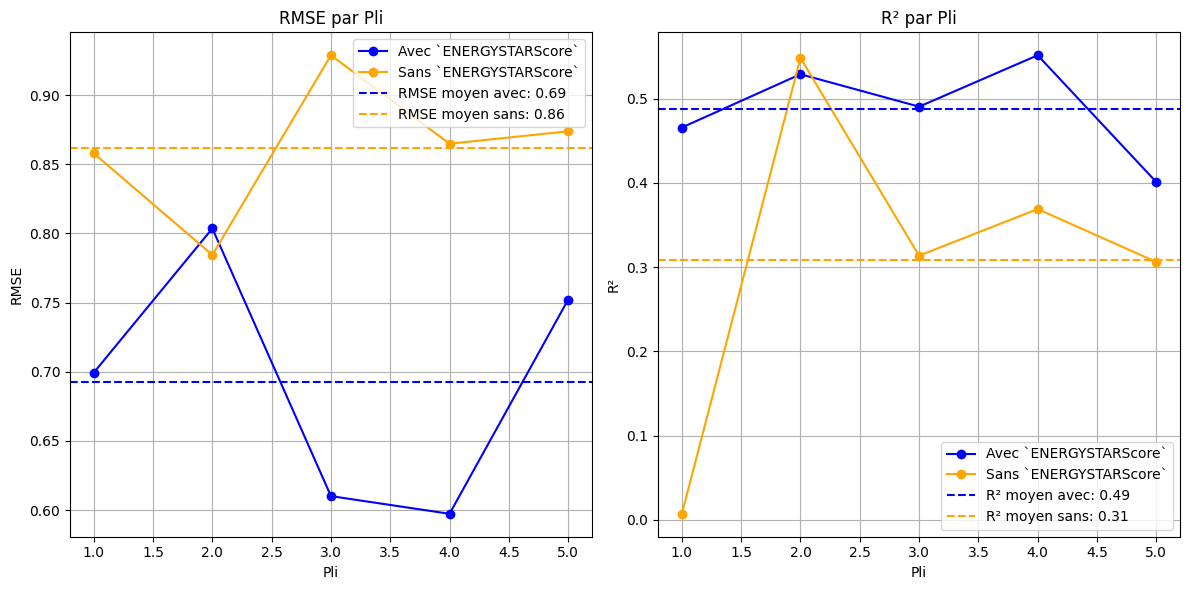

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Liste complète des caractéristiques sauf la cible
all_features = [
    'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
    'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)',
    'GHGEmissionsIntensity', 'Ratio_Electricity', 'Ratio_NaturalGas',
    'Ratio_Steam', 'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
    'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
    'PrimaryPropertyType_Large Office', 'PrimaryPropertyType_Low-Rise Multifamily',
    'PrimaryPropertyType_Medical Office', 'PrimaryPropertyType_Mixed Use Property',
    'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other',
    'PrimaryPropertyType_Refrigerated Warehouse', 'PrimaryPropertyType_Residence Hall',
    'PrimaryPropertyType_Restaurant', 'PrimaryPropertyType_Retail Store',
    'PrimaryPropertyType_Self-Storage Facility', 'PrimaryPropertyType_Senior Care Community',
    'PrimaryPropertyType_Small- and Mid-Sized Office', 'PrimaryPropertyType_Supermarket / Grocery Store',
    'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
    'PrimaryPropertyType_Worship Facility', 'BuildingAge', 'ParkingGFA_Ratio',
    'BuildingGFA_Ratio', 'GFA_Per_Floor'
]

# Filtrer les datasets
df_with_score = SeattleComsuption_Forecast_vf[SeattleComsuption_Forecast_vf['ENERGYSTARScore'].notnull()]
df_without_score = SeattleComsuption_Forecast_vf[SeattleComsuption_Forecast_vf['ENERGYSTARScore'].isnull()].drop(columns=['ENERGYSTARScore'])

# Définir la cible pour les deux datasets
y_with_score = df_with_score['GHGEmissionsIntensity']
y_without_score = df_without_score['GHGEmissionsIntensity']

# Caractéristiques pour chaque dataset
all_features_with_score = [feature for feature in all_features if feature not in ['GHGEmissionsIntensity', 'SiteEUIWN(kBtu/sf)']]
all_features_without_score = [feature for feature in all_features_with_score if feature != 'ENERGYSTARScore']

X_with_score = df_with_score[all_features_with_score]
X_without_score = df_without_score[all_features_without_score]

# Initialiser la validation croisée à 5 plis
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser les listes pour stocker les scores pour chaque pli
rmse_scores_with, r2_scores_with = [], []
rmse_scores_without, r2_scores_without = [], []

# Boucle de validation croisée pour les deux datasets
for train_index, test_index in kf.split(X_with_score):
    # Modèle pour le dataset AVEC `ENERGYSTARScore`
    X_train_with, X_test_with = X_with_score.iloc[train_index], X_with_score.iloc[test_index]
    y_train_with, y_test_with = y_with_score.iloc[train_index], y_with_score.iloc[test_index]
    model_with = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model_with.fit(X_train_with, y_train_with)
    y_pred_with = model_with.predict(X_test_with)
    rmse_scores_with.append(sqrt(mean_squared_error(y_test_with, y_pred_with)))
    r2_scores_with.append(r2_score(y_test_with, y_pred_with))

for train_index, test_index in kf.split(X_without_score):
    # Modèle pour le dataset SANS `ENERGYSTARScore`
    X_train_without, X_test_without = X_without_score.iloc[train_index], X_without_score.iloc[test_index]
    y_train_without, y_test_without = y_without_score.iloc[train_index], y_without_score.iloc[test_index]
    model_without = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model_without.fit(X_train_without, y_train_without)
    y_pred_without = model_without.predict(X_test_without)
    rmse_scores_without.append(sqrt(mean_squared_error(y_test_without, y_pred_without)))
    r2_scores_without.append(r2_score(y_test_without, y_pred_without))

# Calcul des moyennes des scores RMSE et R²
mean_rmse_with = np.mean(rmse_scores_with)
mean_r2_with = np.mean(r2_scores_with)
mean_rmse_without = np.mean(rmse_scores_without)
mean_r2_without = np.mean(r2_scores_without)

# Afficher les scores
print("Scores AVEC `ENERGYSTARScore`")
print("RMSE par pli :", rmse_scores_with)
print("R² par pli :", r2_scores_with)
print(f"RMSE moyen : {mean_rmse_with:.2f}, R² moyen : {mean_r2_with:.2f}")

print("\nScores SANS `ENERGYSTARScore`")
print("RMSE par pli :", rmse_scores_without)
print("R² par pli :", r2_scores_without)
print(f"RMSE moyen : {mean_rmse_without:.2f}, R² moyen : {mean_r2_without:.2f}")

# ---- Visualisation ----
folds = np.arange(1, 6)  # Les indices de pli

# Graphique des scores RMSE pour chaque pli
plt.figure(figsize=(12, 6))

# Graphique des RMSE
plt.subplot(1, 2, 1)
plt.plot(folds, rmse_scores_with, label="Avec `ENERGYSTARScore`", marker='o', color='blue')
plt.plot(folds, rmse_scores_without, label="Sans `ENERGYSTARScore`", marker='o', color='orange')
plt.axhline(y=mean_rmse_with, color='blue', linestyle='--', label=f"RMSE moyen avec: {mean_rmse_with:.2f}")
plt.axhline(y=mean_rmse_without, color='orange', linestyle='--', label=f"RMSE moyen sans: {mean_rmse_without:.2f}")
plt.title("RMSE par Pli")
plt.xlabel("Pli")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)

# Graphique des R²
plt.subplot(1, 2, 2)
plt.plot(folds, r2_scores_with, label="Avec `ENERGYSTARScore`", marker='o', color='blue')
plt.plot(folds, r2_scores_without, label="Sans `ENERGYSTARScore`", marker='o', color='orange')
plt.axhline(y=mean_r2_with, color='blue', linestyle='--', label=f"R² moyen avec: {mean_r2_with:.2f}")
plt.axhline(y=mean_r2_without, color='orange', linestyle='--', label=f"R² moyen sans: {mean_r2_without:.2f}")
plt.title("R² par Pli")
plt.xlabel("Pli")
plt.ylabel("R²")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## **<div style="text-align:center"><span style="font-size:1em;"> <code> 9. Final performance des modèles</code></span> </div>** 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Données des performances des modèles
data = {
    'Modèle': [
        'Régression linéaire', 
        'Bagging Bootstrap Aggregating', 
        'Gradient Boosting Regressor', 
        'Stacking Regressor',
        'Gradient Boosting avec Feature Engineering', 
        'XGBoost avec Feature Engineering', 
        'Random Forest avec Feature Engineering'
    ],
    'RMSE': [0.68, 0.69, 0.62, 0.68, 0.62, 0.67, 0.66],    
    'R²': [0.50, 0.50, 0.59, 0.50, 0.58, 0.49, 0.53]
}

# Création d'un DataFrame
df = pd.DataFrame(data)

# Création des graphiques
# Graphique des RMSE
plt.figure(figsize=(14, 6))

# Graphique pour RMSE
plt.subplot(1, 2, 1)
bars_rmse = plt.bar(df['Modèle'], df['RMSE'], color='skyblue')
plt.xlabel('Modèle')
plt.ylabel('RMSE')
plt.title('Performance des modèles - RMSE')
plt.xticks(rotation=15)

# Ajouter les scores sur les barres de RMSE
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Graphique pour R²
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(df['Modèle'], df['R²'], color='lightgreen')
plt.xlabel('Modèle')
plt.ylabel('R²')
plt.title('Performance des modèles - R²')
plt.xticks(rotation=15)

# Ajouter les scores sur les barres de R²
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()